In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv
import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr
from scipy.special import stdtr
import csv
import pandas as pd

import sys 
import os
sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))
from Data20200706 import *

$$0 =  1-2e^{-\frac{T_{null}}{T1}} + e^{-\frac{TR}{T1}}$$
$$-\frac{T_{null}}{T1} = \ln{\frac{1}{2}} + \ln{\Big(1 + e^{-\frac{TR}{T1}}\Big)}  $$
$$ T_{null} = T1\times\left[\ln{2} + \ln{\Big(1 +e^{-\frac{TR}{T1}}\Big) } \right]$$

$$ M_0 = 1-2e^{-\frac{IR}{T1}} + e^{-\frac{TR}{T1}}$$


### With T1 & T2 effects
$$ S(t) = \left(1-2e^{-\frac{IR}{T1}} + e^{-\frac{TR}{T1}}\right)e^{-\frac{TE}{T2}}$$


### With only T1 effects
$$ S(t) = 1-2e^{-\frac{IR}{T1}} + e^{-\frac{TR}{T1}}$$



In [3]:
# T1 vals
# from https://cds.ismrm.org/ismrm-2001/PDF5/1391.pdf, or from doi: 10.1002/mrm.24550
# [mean, stdev]
CSF = [4500, 263]
blood = [1650, 70]
blood_gd = [500, 70] #with Gd
#wm = [790, 21]
#gm = [1495, 119]

# T2 vals
# from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6786861/, https://renaissance.stonybrookmedicine.edu/sites/default/files/2012Jun_MAGMA_T1T2blood.pdf,https://www.researchgate.net/figure/T1-and-T2-relaxation-times-at-various-anatomical-regions-at-WM-and-GM-areas-in-the-very_tbl1_49686232 
CSF_T2 = [50, 10]
blood_T2 = [48,30] #arterial 50, venous 20 
blood_T2_gd = [40,25] #Gd doesn't shorten T2 as much
#wm_T2 = [237, 7]
#gm_T2 = [159, 3]


# Make a plot showing this with 
1) blood with only T1 \
2) blood with T1 and T2 \
3) CSF \
4) blood with a shorter T1 and T2 effects (not necessarily Gd.) with dropping T1 

In [4]:
def T1_Only(t,T1,TR):
    #assumed M0 = 1 for simplicity
    Mz = (1-2*np.exp(-t/T1)+np.exp(-TR/T1))
    return Mz

def T1_and_T2(t,T1,TR,TE,T2):
    #assumed M0 = 1 for simplicity
    Mz = (1-2*np.exp(-t/T1)+np.exp(-TR/T1))*np.exp(-TE/T2)
    return Mz

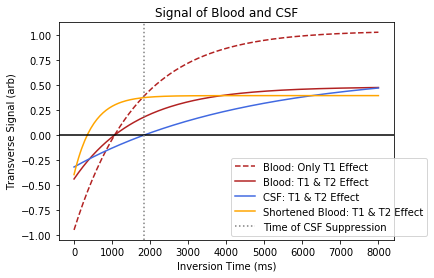

In [18]:
# For 1) blood with only T1
t = np.linspace(0,8000,200) #for 4 seconds
TR = 5000 #in s
TE = 37 #in s

T1 = blood[0] #in ms
MT1_blood = T1_Only(t,T1,TR)
pl.plot(t,MT1_blood,linestyle = '--',color = 'firebrick',label = 'Blood: Only T1 Effect')

# For 1.5) CSF with only T1 effect
T1 = CSF[0] #in ms
MT1_blood = T1_Only(t,T1,TR)
#pl.plot(t,MT1_blood,linestyle = '--',color = 'royalblue',label = 'CSF: Only T1 Effect')

# For 2) blood with T1 and T2
T1 = blood[0] #in ms
T2 = blood_T2[0]
MT1T2_blood = T1_and_T2(t,T1,TR,TE, T2)
pl.plot(t,MT1T2_blood,linestyle = '-',color = 'firebrick',label = 'Blood: T1 & T2 Effect')


# For 3) CSF with T1 and T2
T1 = CSF[0] #in  ms
T2 = CSF_T2[0]
MT1T2_csf = T1_and_T2(t,T1,TR,TE, T2)
pl.plot(t,MT1T2_csf,linestyle = '-',color = 'royalblue',label = 'CSF: T1 & T2 Effect')

# For 4) Blood with shorter T1 but same T2
T1 = blood_gd[0] #in ms
T2 = blood_T2_gd[0]
MT1T2_Gd = T1_and_T2(t,T1,TR,TE, T2)
pl.plot(t,MT1T2_Gd,linestyle = '-',color = 'orange',label = 'Shortened Blood: T1 & T2 Effect')

# x axis
pl.axhline(y = 0,color = 'black')

# IR time = 1850
pl.axvline(x = 1850,color = 'grey',linestyle = ':',label = 'Time of CSF Suppression')

pl.title('Signal of Blood and CSF')
pl.xlabel('Inversion Time (ms)')
pl.ylabel('Transverse Signal (arb)')
pl.legend(bbox_to_anchor=(.5, .4),loc='upper left')
pl.show()

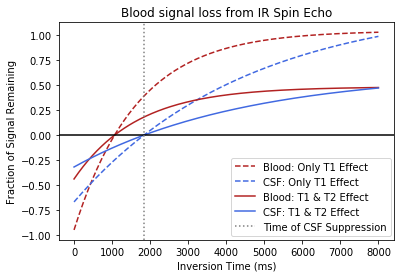

In [27]:
# For 1) blood with only T1
t = np.linspace(0,8000,200) #for 4 seconds
TR = 5000 #in s
TE = 37 #in s

T1 = blood[0] #in ms
MT1_blood = T1_Only(t,T1,TR)
pl.plot(t,MT1_blood,linestyle = '--',color = 'firebrick',label = 'Blood: Only T1 Effect')

# For 1.5) CSF with only T1 effect
T1 = CSF[0] #in ms
MT1_blood = T1_Only(t,T1,TR)
pl.plot(t,MT1_blood,linestyle = '--',color = 'royalblue',label = 'CSF: Only T1 Effect')

# For 2) blood with T1 and T2
T1 = blood[0] #in ms
T2 = blood_T2[0]
MT1T2_blood = T1_and_T2(t,T1,TR,TE, T2)
pl.plot(t,MT1T2_blood,linestyle = '-',color = 'firebrick',label = 'Blood: T1 & T2 Effect')


# For 3) CSF with T1 and T2
T1 = CSF[0] #in  ms
T2 = CSF_T2[0]
MT1T2_csf = T1_and_T2(t,T1,TR,TE, T2)
pl.plot(t,MT1T2_csf,linestyle = '-',color = 'royalblue',label = 'CSF: T1 & T2 Effect')

# For 4) Blood with shorter T1 but same T2
#T1 = blood_gd[0] #in ms
#T2 = blood_T2_gd[0]
#MT1T2_Gd = T1_and_T2(t,T1,TR,TE, T2)
#pl.plot(t,MT1T2_Gd,linestyle = '-',color = 'orange',label = 'Shortened Blood: T1 & T2 Effect')

# x axis
pl.axhline(y = 0,color = 'black')

# IR time = 1850
pl.axvline(x = 1850,color = 'grey',linestyle = ':',label = 'Time of CSF Suppression')

pl.title('Blood signal loss from IR Spin Echo')
pl.ylabel('Fraction of Signal Remaining')
pl.xlabel('Inversion Time (ms)')
pl.legend(bbox_to_anchor=(.5, .4),loc='upper left')
pl.show()

In [14]:
print(t[46])
print(MT1T2_blood[46])

1849.246231155779
0.04933687911795088
